# PLacement Campus Prediction

Problem

* Campus placement chances are important criteria while selecting an educational institution by the student. Several factors contribute to the campus placements for a student both academic and non-academic.Of these, academic achievements, both present and past, softskills, domain
knowledge, area of specialization, socio economic attributes
are considered here. The model is based on logistic regression which is a commonly usedclassification algorithm in this type of problems. 

In [12]:
#Ipmorting Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
#Reading the placement dataset in a dataframe using pandas 
placement = pd.read_csv('/content/Placement_Data_Full_Class.csv') 

In [14]:
# First 5 Rows of placement dataset in a dataframe using pandas
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [15]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Understanding the features of the dataset

In [ ]:
#Creating a copy of our dataset 
placement_copy = placement.copy()

In [ ]:
#To undestand the shape of the data our data has 215 rows and 15 columns 
placement_copy.shape

(215, 15)

In [8]:
# To check the nane values
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
#Implementing fillna method to remove the nane values in the salary column
placement_copy['salary'].fillna(value=0,inplace =True)

In [11]:
# To Check again the changes of the nane values
placement_copy.isnull().sum() 

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [12]:
# To drop the colums which are not required for the prediction sl_no, ssc_b,hsc_b
placement_copy.drop(['sl_no','ssc_b','hsc_b'],axis=1, inplace= True)

In [13]:
# TO check and confirm the removal of the columns not used for prediction
placement_copy

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Outliers of the placement model

Text(0.5, 1.0, 'Employbility Percentage')

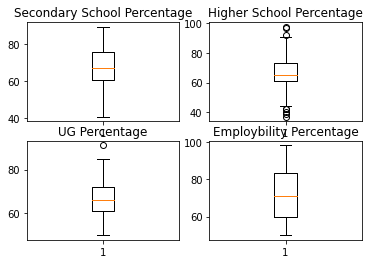

In [14]:
# plotting of the graphs and checking out the outliners 
ax = plt.subplot(221) 
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222) 
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher School Percentage')

ax = plt.subplot(223) 
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224) 
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employbility Percentage')

* As we can see from the above graph there is  outliers in the graph plotted of Higher School Precentage

In [15]:
#TO reove the outliers 
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 -Q1

fliter = (placement_copy['hsc_p'] >= Q1-1.5 * IQR) & (placement_copy['hsc_p'] <= Q3-1.5 * IQR)
placement_flitered = placement_copy.loc[fliter]

{'boxes': [<matplotlib.lines.Line2D at 0x7f7caf8ac810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7caf8b0890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7caf8398d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7caf839390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7caf8acdd0>,
  <matplotlib.lines.Line2D at 0x7f7caf8b0350>]}

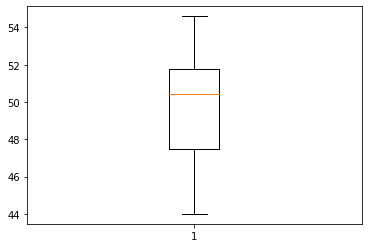

In [16]:
# Plotting of the graph agin to check if the outliers are removed or not 
plt.boxplot(placement_flitered['hsc_p'])

# Count Plot graph

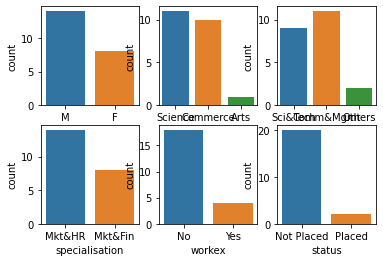

In [17]:
# defining the figure size 
plt.subplot(231)
ax = sns.countplot(x = 'gender', data = placement_flitered)
# ploting of the subplot graph
plt.subplot(232)
ax = sns.countplot(x = 'hsc_s', data = placement_flitered)

plt.subplot(233)
ax = sns.countplot(x = 'degree_t', data = placement_flitered)

plt.subplot(234)
ax = sns.countplot(x = 'specialisation', data = placement_flitered)

plt.subplot(235)
ax = sns.countplot(x = 'workex', data = placement_flitered)

plt.subplot(236)
ax = sns.countplot(x = 'status', data = placement_flitered)

From the above plotted graphics we understand the number of students placed 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


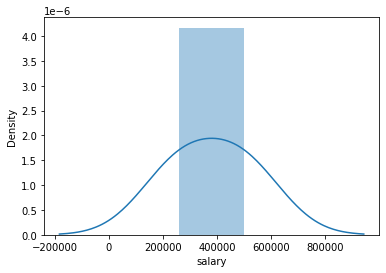

In [18]:
# Distrubtion plot graph
placement_placed =placement_flitered[placement_flitered.salary!=0]
sns.distplot(placement_placed['salary'])

#Encoding

* we use two types of encoding 
* Label Encoding
* OneHot Encoding

In [19]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
obj_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()

for col in obj_cols:
  placement_flitered[col] = label_encoder.fit_transform(placement_flitered[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# to check if the encoding is implemented or not 
placement_flitered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,1,56.00,52.0,Science,52.00,Sci&Tech,0,66.00,1,59.43,0,0.0
5,1,55.00,49.8,Science,67.25,Sci&Tech,1,55.00,0,51.58,0,0.0
6,0,46.00,49.2,Commerce,79.00,Comm&Mgmt,0,74.28,0,53.29,0,0.0
14,1,62.00,47.0,Commerce,50.00,Comm&Mgmt,0,76.00,1,54.96,0,0.0
25,0,52.58,54.6,Commerce,50.20,Comm&Mgmt,1,76.00,0,65.33,0,0.0


In [22]:
#One Hot endcoding
dummy_hsc_s = pd.get_dummies(placement_flitered['hsc_s'], prefix ='dummy')
dummy_degree_t = pd.get_dummies(placement_flitered['degree_t'], prefix ='dummy')

placement_coded = pd.concat([placement_flitered , dummy_hsc_s , dummy_degree_t], axis = 1)
placement_coded.drop(['hsc_s','degree_t','salary'], axis = 1 , inplace = True )

In [23]:
# to check if the encoding is implemented or not 
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
3,1,56.00,52.0,52.00,0,66.00,1,59.43,0,0,0,1,0,0,1
5,1,55.00,49.8,67.25,1,55.00,0,51.58,0,0,0,1,0,0,1
6,0,46.00,49.2,79.00,0,74.28,0,53.29,0,0,1,0,1,0,0
14,1,62.00,47.0,50.00,0,76.00,1,54.96,0,0,1,0,1,0,0
25,0,52.58,54.6,50.20,1,76.00,0,65.33,0,0,1,0,1,0,0


In [24]:
# Passing of the variables to X and y
X = placement_coded.drop(['status'],axis=1)
y =placement_coded.status

#Model Building

Splitting of data into train and test

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test = train_test_split(X , y ,train_size = 0.8 , random_state =1 )


# Logistic Regression Model

To train the model and predicting of the data 

In [26]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(logreg.score(X_test , y_test))

0.8


#Decision Tree Model

To train the model and to predicting of data

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

dt = dt.fit(X_train ,y_train)
y_pred = dt.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('placement Campus prediction report.ipynb')